# 쇼핑몰 리뷰 데이터셋
- https://drive.google.com/file/d/1ahcYxV7siixzb0DllPTaZblwCxh0Zuuv/view?usp=sharing

# 주제 분석(Topic Analysis)
- 텍스트 데이터에 대한 비지도 학습
- 텍스트 데이터에서 **주제(토픽)**를 자동으로 추출하거나 분류하는 자연어 처리(NLP)의 한 기술
- 문서, 리뷰, 뉴스 기사 등 다양한 텍스트 데이터가 가지고 있는 숨겨진 구조를 이해하고자 할 때 사용
- 문서의 단어빈도에 영향을 미치는 잠재 변수가 있다고 가정
> 여기서 잠재변수를 주제(topic) 라고 한다.


## 토픽(Topic)
- 텍스트 데이터에서 반복적으로 나타나는 단어 그룹이나 주제를 말함
- 예:
    - 뉴스 기사에서 "경제", "스포츠", "정치" 등이 주요 토픽일 수 있음
    - 고객 리뷰에서 "서비스 품질", "가격", "상품 기능" 등이 주요 토픽일 수 있음

## 토픽 분석 목적
- 텍스트 데이터의 숨겨진 구조 이해
- 대량의 텍스트를 요약
- 유사한 텍스트 간의 군집화
- 정보 검색등의 시스템 개선

## 토픽 분석의 유형
- 비 지도 학습 기반 토픽 모델링
    - 텍스트 데이터에서 토픽을 자동으로 추출
    - LSA, LDA 등의 방식을 사용
- 지도 학습 기반 토픽 모델링
    - 특정 주제 또는 레이블로 미리 정의된 텍스트를 분류
    - 머신러닝, 딥러닝 모델 등을 사용

## 활용 사례
- 문서 요약
    - 대량의 문서를 요약하여 주요 주제를 파악
- 의견 분석
    - 고객 리뷰에서 긍정적/부정적 요소와 관련된 토픽을 추출
- 추천 시스템
    - 문서나 상품을 유사한 토픽 기반으로 추천
- 뉴스 분류 및 클러스터링
    - 유사한 주제를 가진 뉴스를 자동으로 묶거나 분류
- 소셜 미디어 분석
    - 트윗, 댓글, 포럼 데이터에서 특정 주제의 대화를 분석

# LSA(Latent Semantic Analysis)
- 잠재 의미 분석
- 단어 문서 행렬을 행렬분해하는 방법
    - SVD를 기반으로 한 행렬 분해 방법
    - LSA는 문서-단어 행렬에서 숨겨진 의미를 추출하기 위해 SVD를 사용
- 계산이 비교적 단순하고 통계학에서 많이 사용되는 기법
- 문서들이 단어가 아닌 의미상으로 재배치 되는 효과
- 동음이의어, 오탈자 등이 어느정도 처리가 되는 효과
- 문서에 존재하는 noise가 줄어 전처리 되는 효과


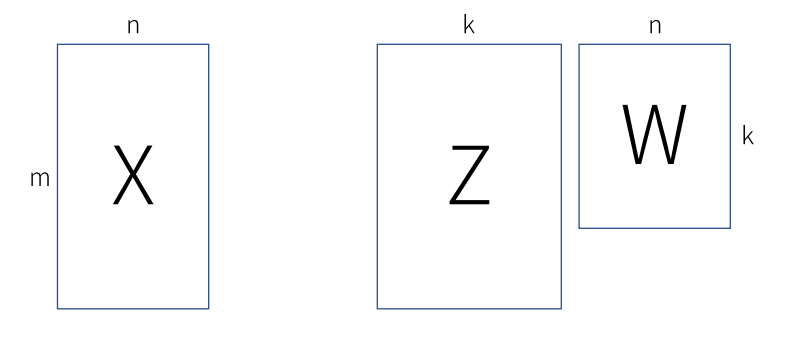

## Truncated SVD 활용한 주제 분석
1. 텍스트 데이터를 벡터화하여 문서-단어 행렬 생성
2. SVD 적용하여 행렬 분해
- $U$: 문서와 토픽 간의 관계를 나타내는 행렬 ($m \times k$)
- $Σ$: 토픽의 중요도를 나타내는 대각 행렬 ($k \times k$)
- $V^T$: 토픽과 단어 간의 관계를 나타내는 행렬 ($k \times n$)

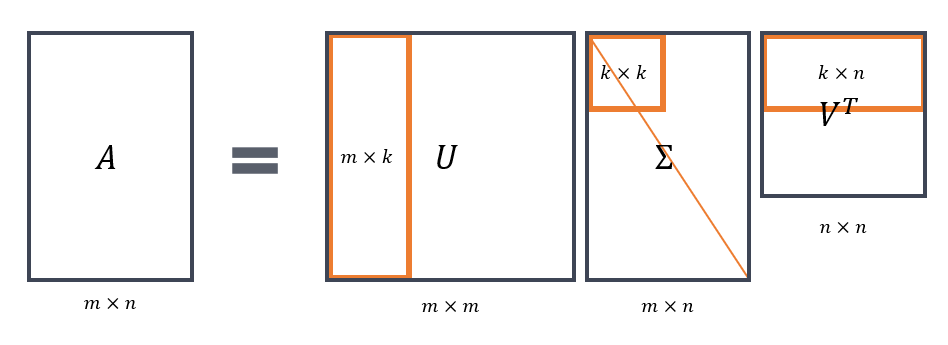

In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

DATA_PATH = "../data/"
SEED = 42

In [2]:
df = pd.read_csv(f"{DATA_PATH}clothing_reviews.csv")
df

,날짜,리뷰
0,2021-03-25,S인데도 굉장히 박시하네요 사진상으론 약간 빛 바랜 검정으로 나왓는데 빛때메 그렇고...
1,2021-01-19,팔길이가 조금 긴 것 같은데 신경 쓰일 정돈 아니고 딱 오버핏이에요 기모도 따뜻해요...
2,2022-11-21,핏은 오버핏이고 자수가 귀여워요\n근데 한번 세탁+건**지 하고 입었는데 먼지 장난...
3,2022-11-11,키 168에 55반 / m사이즈 박시하게 입기에 좋아요\n기모도 따뜻하고 모자도 커...
4,2021-12-22,사이즈는 완전 오버핏이지만 예뻐요\n근데 새옷인데도 검은옷에 겉에 흰 먼지가 많이 ...
...,...,...
4937,2022-08-29,귀여워용 어깨넓어서 그런지입으면 끈모양 이상해 보여서 모델핏은 안나오긴한데 어차피 ...
4938,2022-03-05,"보기에 좀 짧고, 줄길이가 짧울줄 알았는데 괜찮네요!!\n크롭 좋아하는 사람들은 좋..."
4939,2022-01-05,일반 크롭나시 재질에 배송 평범합니다 한 3일 걸린거 같아요 근데 너무 헐렁하고 쫀...
4940,2022-06-20,재질이너무부드러워서 일단만족. 길이는 키 체형에 따라 차이잇을꺼같은데 일단 저한테는...


In [3]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

In [4]:
kiwi.tokenize(df["리뷰"][0])

[Token(form='S', tag='SL', start=0, len=1),
 Token(form='이', tag='VCP', start=1, len=1),
 Token(form='ᆫ데', tag='EC', start=1, len=2),
 Token(form='도', tag='JX', start=3, len=1),
 Token(form='굉장히', tag='MAG', start=5, len=3),
 Token(form='박', tag='NNP', start=9, len=1),
 Token(form='시', tag='NNG', start=10, len=1),
 Token(form='하', tag='XSA', start=11, len=1),
 Token(form='네요', tag='EF', start=12, len=2),
 Token(form='사진', tag='NNG', start=15, len=2),
 Token(form='상', tag='XSN', start=17, len=1),
 Token(form='으로', tag='JKB', start=18, len=2),
 Token(form='ᆫ', tag='JX', start=19, len=1),
 Token(form='약간', tag='MAG', start=21, len=2),
 Token(form='빛', tag='NNG', start=24, len=1),
 Token(form='바래', tag='VV', start=26, len=2),
 Token(form='ᆫ', tag='ETM', start=27, len=1),
 Token(form='검정', tag='NNG', start=29, len=2),
 Token(form='으로', tag='JKB', start=31, len=2),
 Token(form='나오', tag='VV', start=34, len=2),
 Token(form='엇', tag='EP', start=35, len=1),
 Token(form='는데', tag='EC', start=36,

- NNG(일반 명사), VV(동사), VA(형용사), SL(알파벳)

In [5]:
result = kiwi.tokenize(df["리뷰"])
token_list = []

for tokens in result:
    tokens = [t.form for t in tokens if t.tag in ["NNG", "VV", "VA", "SL"]]
    token_list.append(tokens)

In [6]:
min(len(token) for token in token_list)

2

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features=1000)
x_arr = vec.fit_transform([" ".join(token) for token in token_list]).toarray()
x_arr.shape

(4942, 1000)

## SVD 적용

In [9]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, random_state=SEED)
u_arr = svd.fit_transform(x_arr)
u_arr.shape

(4942, 20)

## U 행렬

In [10]:
u_arr # 행: 샘플, 열: 주제

array([[ 0.53461531, -0.09051531, -0.38640315, ...,  0.06256717,
         0.40879423, -0.14851619],
       [ 0.58061975, -0.15043304, -0.11470448, ..., -0.12813762,
         0.38186392,  0.04810439],
       [ 0.13734309, -0.00639351, -0.02540889, ..., -0.11036345,
        -0.09977601, -0.33534438],
       ...,
       [ 0.84566844, -0.27639632, -0.11334893, ..., -0.33860383,
         0.43167149,  0.61915159],
       [ 0.79198947, -0.25062681, -0.21093584, ...,  0.46581019,
        -0.01990401,  0.06311191],
       [ 1.26410891, -0.7135997 ,  0.57395538, ...,  0.03146534,
        -0.3116915 , -0.04965665]])

In [11]:
u_arr.shape

(4942, 20)

## 특이값 벡터

In [12]:
svd.singular_values_ # 주제 중요도

array([66.18565081, 42.31416453, 36.76715372, 34.68119624, 33.6617773 ,
       32.95697599, 31.31195617, 30.90508704, 29.70148306, 28.63424847,
       28.2061432 , 27.81326065, 26.63584854, 25.96460416, 25.83023608,
       25.24347016, 24.56293822, 24.47966759, 23.49340182, 22.79758453])

In [13]:
svd.singular_values_.shape

(20,)

## Vt 행렬

In [14]:
svd.components_ # 행: 주제, 열: 단어

array([[ 6.55694698e-03,  7.94576519e-04,  8.81055061e-04, ...,
         4.87316344e-02,  1.67878301e-03,  1.19252718e-02],
       [-7.83877176e-04, -1.11642801e-03,  9.16270354e-04, ...,
        -2.61641752e-02,  5.23869307e-04,  3.00580006e-03],
       [-4.33567294e-03,  1.09475930e-03, -1.10664918e-04, ...,
        -2.65726413e-02, -2.39672012e-03,  2.29218405e-03],
       ...,
       [-6.75753210e-03,  2.65322427e-03,  1.97207994e-03, ...,
         7.93921816e-02, -8.30355025e-04, -1.39156062e-05],
       [-3.27687158e-03,  2.10722593e-03, -6.71929030e-04, ...,
         2.22446132e-01, -6.33226335e-04,  6.86461254e-03],
       [-1.02105997e-03, -8.81055364e-04,  1.02762165e-04, ...,
        -1.51359489e-01,  4.14610686e-03,  5.43734915e-03]])

In [15]:
svd.components_.shape

(20, 1000)

- Vt 행렬의 단어 번호에 대응되는 실제 단어 정보

In [16]:
vec.get_feature_names_out().shape

(1000,)

## K 값(토픽 수) 선택

### 엘보우 방법
- 특이값의 크기를 시각화해서 K 값을 선택하는 방법
- 특이값이 급격히 갑소하다가 완만해지는 지점의 K 값 선택

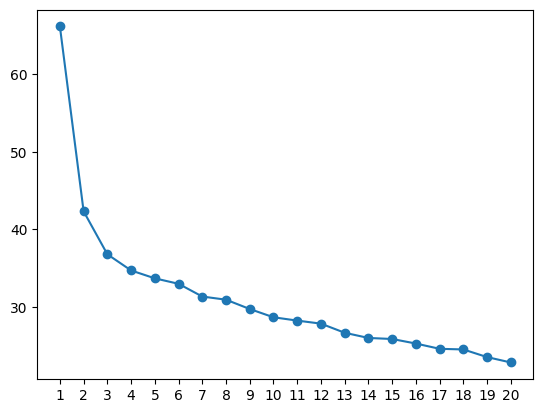

In [17]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,21), svd.singular_values_, marker="o")
plt.xticks(np.arange(1, 21))
plt.show()

## 주제 응집도(Topic coherence)
- 주제를 구성하는 단어들이 서로 연관된 정도
- 0 ~ 1 사이의 값을 가지고, 1에 가까울수록 응집력이 높음

## Gensim 라이브러리
- 파이썬 기반의 자연어 처리 라이브러리
- 토픽 모델링, 워드 임베딩 등 다양한 기능 지원
```bash
pip install gensim
```

## CoherenceModel 클래스
- 토픽의 응집력을 평가하는 클래스
- model: 학습된 토픽 모델 객체 전달
    - topics 파라미터에 인수 전달 시 생략 가능
- topics: 각 토픽에서 추출된 토큰화된 데이터
- texts: 전체 문서의 토큰화된 데이터
- dictionary: gensim의 딕셔너리 객체 전달

In [18]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [19]:
def coherence_score(token_list, svd, words):
    tmp = np.argsort(svd.components_, axis=1)[:, ::-1] # 기본값 오름차순 / 내림차순으로 변경
    topics = []

    for arr in tmp[:, :10]:
        topics.append([words[i] for i in arr])

    dic = Dictionary(token_list)
    cos = CoherenceModel(topics=topics, texts=token_list, dictionary=dic)

    return cos.get_coherence()

In [20]:
words = vec.get_feature_names_out()
coherence_score(token_list, svd, words)

0.3932611160951808

In [21]:
scores = []

for k in range(2, 21):
    svd = TruncatedSVD(n_components=k, random_state=SEED)
    svd.fit(x_arr)
    score = coherence_score(token_list, svd, words)
    scores.append(score)

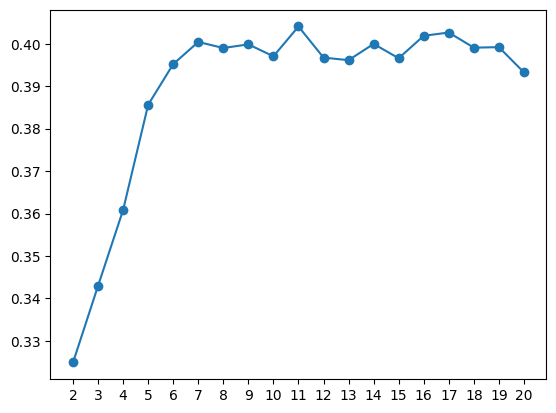

In [22]:
plt.plot(np.arange(2, 21), scores, marker="o")
plt.xticks(np.arange(2, 21))
plt.show()

In [23]:
svd = TruncatedSVD(n_components=8, random_state=SEED)
u_arr = svd.fit_transform(x_arr)
u_arr.shape

(4942, 8)

In [24]:
idx_arr = np.argsort(svd.components_)[:, ::-1] # 열방향 오름차순 -> 내림차순
idx_arr

array([[615, 465, 385, ..., 347, 301, 279],
       [615, 462, 185, ...,  77, 688, 465],
       [465,  77, 615, ...,  84, 385, 688],
       ...,
       [163, 734, 688, ..., 396,  77, 385],
       [734, 385, 426, ..., 361, 396, 163],
       [ 84, 385, 465, ..., 688, 734,  77]], dtype=int64)

In [25]:
words.shape

(1000,)

In [26]:
lst = []

for k, arr in enumerate(idx_arr):
    lst.append([words[i] + f"({svd.components_[k, i]})" for i in arr])

In [28]:
df_topics = pd.DataFrame(lst).T.add_suffix("번주제")
df_topics.head(10)

,0번주제,1번주제,2번주제,3번주제,4번주제,5번주제,6번주제,7번주제
0,예쁘(0.41775354159989025),예쁘(0.859655051041563),생각(0.7364701703703846),이쁘(0.6384859918551982),느낌(0.47039194877104806),느낌(0.5924798191256927),재질(0.7391084770323407),구매(0.5641079294743803)
1,생각(0.3940869288205336),색감(0.047927568701994),괜찮(0.07465847313045694),생각(0.34017590124277336),보이(0.45456900022029156),재질(0.33325206198784896),보이(0.3759839161957869),보이(0.2848816783779453)
2,보이(0.24766653946988382),단추(0.024573265799924443),예쁘(0.06424882773732801),보이(0.18818723559297942),부분(0.33599724436061),이쁘(0.25505970075127316),비치(0.08997832482388071),생각(0.2042410322934536)
3,느낌(0.24745300832561504),디테일(0.01862675616773325),후기(0.015508244050261518),예쁘(0.15720578421928347),가슴(0.1440918040880755),생각(0.10925206901881596),셔츠(0.060510464343620396),색상(0.17247548377113914)
4,재질(0.2078254218975668),구김(0.016737825792372332),이너(0.014964925037557671),색감(0.03978366649879453),어깨(0.10586444233923488),셔츠(0.1042031150228062),생각(0.05196565555583179),셔츠(0.13820145135693646)
5,부분(0.19305304824697195),청바지(0.00946570706617231),놀라(0.013954107035127832),라인(0.029630286389304362),사진(0.08634269339354564),색감(0.05611530641911575),속옷(0.04108413761745045),느낌(0.060643125412844626)
6,이쁘(0.18635428942477053),소라(0.0093583111564584),파이(0.012267441517224063),팔뚝(0.02189604048503907),팔뚝(0.050158932083816596),예쁘(0.04685599228552873),어깨(0.03705144408965059),블랙(0.0522257852369696)
7,괜찮(0.18251364908392456),오버핏(0.009167300858842408),애매(0.009696183524515938),디자인(0.019756624466703707),비치(0.04951802729712328),여름(0.03401083138187032),이너(0.029067869361439094),여름(0.047926377765401644)
8,구매(0.18219811413632753),언니(0.007157281251329117),비치(0.009505863006875783),허리(0.0178012984465024),허리(0.047987396043048296),화면(0.02600830554934269),파이(0.027658681944743062),어깨(0.04780788078644225)
9,정도(0.15164791238371933),생기(0.006844440983997086),두께(0.009376715129294668),어깨(0.01562537047760235),속옷(0.041408012649031906),구김(0.02368274556383374),여리여리(0.023466580231072346),화이트(0.04582396519900371)


In [29]:
df_topics.tail(10)

,0번주제,1번주제,2번주제,3번주제,4번주제,5번주제,6번주제,7번주제
990,마무리(0.0005572090890023202),길이(-0.0543771480818894),만족(-0.04299779345779798),만족(-0.07838874720046288),빠르(-0.07041544171948386),어깨(-0.07802931507413272),마감(-0.06080356184541735),예쁘(-0.06700368794845608)
991,조음(0.0005393108621737497),구매(-0.05898864958406903),사이즈(-0.05385476710912003),색상(-0.0848905998921015),셔츠(-0.079718947346512),구매(-0.081467058760472),괜찮(-0.06851459572923149),마감(-0.08267533888321128)
992,감촉(0.0005190379958945181),퀄리티(-0.06570969761291869),사진(-0.058232323705022855),정도(-0.08892842193657197),괜찮(-0.08091287383553818),퀄리티(-0.08899896418024877),퀄리티(-0.07361798479125096),퀄리티(-0.12099680534589431)
993,적당(0.00045371747363199454),사이즈(-0.0657890372289533),부분(-0.0627151360109311),셔츠(-0.1041245055007142),예쁘(-0.08202390419016109),가슴(-0.09596258630056094),소재(-0.07682434079032191),정도(-0.13003608903156993)
994,크롭기(0.00042043255814327123),정도(-0.06619751679692801),셔츠(-0.07769909226110881),사이즈(-0.1074752347177475),정도(-0.08646786506385157),가격(-0.11920082378773572),길이(-0.0786537257004792),부분(-0.1489333139871005)
995,전용(0.000419913833308036),느낌(-0.0958007379270823),색상(-0.09272212750076321),괜찮(-0.17749124436489014),가격(-0.08840272426057133),배송(-0.1525783169165277),정도(-0.08791238788462834),배송(-0.1510557983910932)
996,퀄이(0.0003986218762436551),가격(-0.09610296066624177),느낌(-0.11344392286112051),가격(-0.19198841486167023),색상(-0.10778229097964628),정도(-0.1540127423459065),색상(-0.10357932610914326),가격(-0.17335829598644475)
997,박스(0.00037611305310146),괜찮(-0.1580425826330419),구매(-0.2092464176095835),느낌(-0.24658075631127296),배송(-0.21998789196896568),부분(-0.23705948688276446),배송(-0.1381165328843104),이쁘(-0.19983664435733886)
998,면도(0.000283542669859204),이쁘(-0.26083575319646185),보이(-0.2581539495357511),구매(-0.297499942035898),이쁘(-0.2577718998274373),괜찮(-0.2550724794965738),부분(-0.2151301742639112),재질(-0.2806586367825485)
999,막히(0.00020054383248430593),생각(-0.3102071675719971),이쁘(-0.5175579997650174),재질(-0.3209696931498543),구매(-0.427116861899568),보이(-0.42767956696550025),느낌(-0.37488100697355003),괜찮(-0.45361251513946516)


- 특정 주제에 대한 월별 추이

In [30]:
df["연도_월"] = df["날짜"].str[:7]

In [31]:
tmp = pd.DataFrame(u_arr).add_suffix("_번주제")
df = pd.concat([df, tmp], axis=1)
df.head()

,날짜,리뷰,연도_월,0_번주제,1_번주제,2_번주제,3_번주제,4_번주제,5_번주제,6_번주제,7_번주제
0,2021-03-25,S인데도 굉장히 박시하네요 사진상으론 약간 빛 바랜 검정으로 나왓는데 빛때메 그렇고...,2021-03,0.534616,-0.090490,-0.387948,0.155322,0.533420,-0.500433,0.311978,0.275748
1,2021-01-19,팔길이가 조금 긴 것 같은데 신경 쓰일 정돈 아니고 딱 오버핏이에요 기모도 따뜻해요...,2021-01,0.580621,-0.150417,-0.115415,-0.180592,-0.085767,-0.277823,-0.235534,-0.093916
2,2022-11-21,핏은 오버핏이고 자수가 귀여워요\n근데 한번 세탁+건**지 하고 입었는데 먼지 장난...,2022-11,0.137343,-0.006492,-0.026385,-0.029440,-0.067993,-0.059577,-0.103873,-0.103313
3,2022-11-11,키 168에 55반 / m사이즈 박시하게 입기에 좋아요\n기모도 따뜻하고 모자도 커...,2022-11,0.144017,-0.068714,-0.058631,-0.102296,-0.051653,0.000825,-0.064597,0.018964
4,2021-12-22,사이즈는 완전 오버핏이지만 예뻐요\n근데 새옷인데도 검은옷에 겉에 흰 먼지가 많이 ...,2021-12,1.287563,1.619198,-0.016989,0.168253,0.130841,-0.192526,-0.423202,-0.370172


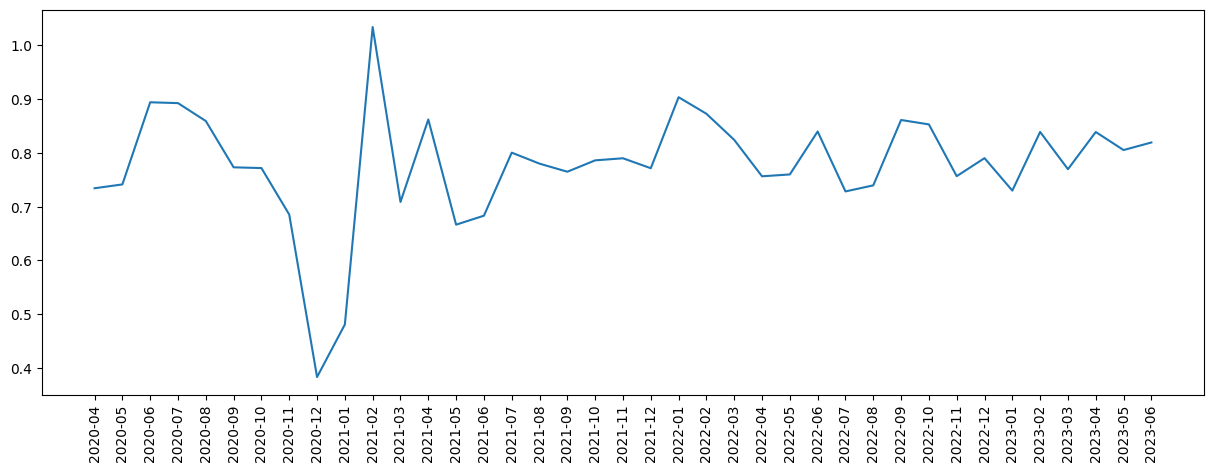

In [32]:
tmp = df.groupby("연도_월")["0_번주제"].mean().reset_index()
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(tmp["연도_월"], tmp["0_번주제"])
ax.tick_params(axis='x', rotation=90)
plt.show()

# LDA(Latent Dirichlet Allocation)
- 잠재 디리클레 할당
- 각 문서에 어떤 주제들이 얼마만큼의 확률로 존재하는지에 대한 확률 모델
- 문서에 잠재된 주제를 추출하여 주제 확률 분포로 나타냄
- 각 문서는 여러 주제의 혼합 분포로 되어 있다고 가정
- 우리가 관찰하는 단어는 주제에서 추출된다고 가정

## LDA의 수행 과정
- 깁스 샘플링(Gibbs Sampling) 기법을 사용

1. LDA는 토픽의 개수 k를 입력받는다.
    -  k개의 토픽이 M개의 전체 문서에 걸쳐 분포되어 있다고 가정
2. LDA는 모든 문서의 모든 단어에 대해서 k개의 토픽 중 하나의 토픽에 랜덤하게 할당한다.
    - 이 작업이 끝나면 각 문서는 토픽 분포를 가지며, 토픽은 단어 분포를 가진 상태
3. 모든 문서의 모든 단어에 대해서 k개의 토픽중 하나에 재할당
    - 문서 내의 하나의 단어를 토픽에 재할당 하기 위해 문서 내의 토픽 분포와 각 토픽의 단어 분포를 계산
        - 나머지 단어들은 정답인 토픽에 할당되었다고 가정
    - 계산한 분포를 기반으로 각 토픽에 할당될 확률을 계산한 후 가장 높은 확률의 토픽에 재할당
    - 모든 문서의 모든 단어에 대해서 반복
    

- gensim의 딕셔너리 객체 만들기
    - 전체 문서에 대해 토큰화된 리스트 전달

In [33]:
from gensim.corpora import Dictionary

dic = Dictionary(token_list)

In [34]:
len(dic)

4514

In [35]:
dic.filter_extremes(no_below=10) # 문서에 거의 등장하지 않는 단어를 제외하는 옵션

In [36]:
len(dic)

814

- corpus 만들기
    - 토큰화된 리스트를 doc2bow에 하나의 샘플씩 전달

In [37]:
corpus = [dic.doc2bow(tokens) for tokens in token_list]

## LdaModel 클래스
- corpus: 샘플별 단어 빈도 데이터
- num_topics: 토픽 수
- id2word: gensim의 딕셔너리 객체
- passes: 반복 횟수(10회 이상)

In [38]:
from gensim.models import LdaModel

# 학습 시작
model = LdaModel(corpus=corpus, num_topics=8, id2word=dic, passes=10, random_state=SEED)

- 모델 저장하기

In [39]:
model.save("../output/lda_model")

- 모델 불러오기

In [40]:
model = LdaModel.load("../output/lda_model")

- 각 토픽의 연관성 높은 단어 확인

In [46]:
model.print_topics(10)

[(0,
  '0.074*"같" + 0.069*"좋" + 0.041*"가격" + 0.035*"생각" + 0.034*"얇" + 0.031*"재질" + 0.022*"퀄리티" + 0.022*"괜찮" + 0.021*"비치" + 0.020*"사"'),
 (1,
  '0.041*"부분" + 0.030*"예쁘" + 0.025*"때" + 0.024*"보이" + 0.023*"같" + 0.023*"단추" + 0.021*"좋" + 0.020*"옷" + 0.020*"하" + 0.019*"가슴"'),
 (2,
  '0.070*"색" + 0.031*"색상" + 0.030*"사진" + 0.030*"같" + 0.023*"하" + 0.022*"느낌" + 0.019*"다르" + 0.019*"생각" + 0.017*"있" + 0.017*"구매"'),
 (3,
  '0.068*"좋" + 0.056*"같" + 0.042*"크" + 0.037*"예쁘" + 0.026*"생각" + 0.024*"이쁘" + 0.023*"길" + 0.022*"있" + 0.018*"핏" + 0.017*"사이즈"'),
 (4,
  '0.046*"옷" + 0.035*"나" + 0.034*"하" + 0.034*"냄새" + 0.030*"세탁" + 0.025*"티" + 0.022*"빨" + 0.022*"먼지" + 0.022*"나오" + 0.018*"같"'),
 (5,
  '0.063*"배송" + 0.052*"하" + 0.038*"오" + 0.035*"사" + 0.025*"옷" + 0.022*"되" + 0.018*"주문" + 0.017*"빠르" + 0.017*"반품" + 0.015*"걸리"'),
 (6,
  '0.040*"있" + 0.034*"같" + 0.030*"좋" + 0.026*"어깨" + 0.024*"크" + 0.023*"보이" + 0.023*"작" + 0.022*"짧" + 0.020*"사" + 0.020*"길이"'),
 (7,
  '0.117*"들" + 0.062*"맘" + 0.060*"사" + 0.049*"구매" + 0.039

In [42]:
model.print_topic(7)

'0.117*"들" + 0.062*"맘" + 0.060*"사" + 0.049*"구매" + 0.039*"마음" + 0.029*"색" + 0.027*"좋" + 0.023*"예쁘" + 0.015*"검정" + 0.014*"색상"'

- 문서별 토픽 확률

In [47]:
model.get_document_topics(corpus[0])

[(6, 0.394166), (7, 0.5521687)]

- 문서별 토픽 확률 분포를 데이터프레임으로 만들기

In [48]:
df_lda = []

for lst in model.get_document_topics(corpus):
    lst = np.array(lst)
    tmp = np.zeros(8)
    idx = lst[:,0].astype(int)
    tmp[idx] = lst[:,1]
    df_lda.append(tmp)

In [49]:
df_lda = pd.DataFrame(df_lda)
df_lda.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.394176,0.552158
1,0.000000,0.297023,0.257226,0.401013,0.000000,0.000000,0.000000,0.000000
2,0.113441,0.011373,0.011376,0.011443,0.818238,0.011384,0.011375,0.011370
3,0.011368,0.011378,0.011366,0.920392,0.011367,0.011388,0.011372,0.011367
4,0.000000,0.324169,0.000000,0.110592,0.332147,0.208063,0.000000,0.000000


In [50]:
df_lda.idxmax(axis=1)

0       7
1       3
2       4
3       3
4       4
       ..
4937    6
4938    6
4939    6
4940    6
4941    0
Length: 4942, dtype: int64

## LDA 시각화

In [52]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

- 첫 번째 인수로 LDA 모델 객체
- 두 번째 인수로 corpus 객체
- 세 번째 인수로 gensim의 딕셔너리 객체

In [53]:
vis = pyLDAvis.gensim.prepare(model, corpus, dic)

### 해석 방법
- 토픽 번호는 1번부터 시작
- 왼쪽 그래프
    - 원의 크기가 클수록 토픽 중요도가 높음
    - 원 사이 거리가 멀수록 토픽 간 관계 없음
- 오른쪽 그래프
    - 특정 토픽 미선택(Selected Topic: 0)
        - x축: 전체 문서에서 단어의 빈도수
        - y축: 토픽 구분에 대한 기여도
    - 특정 토픽 선택(Selected Topic: 1 이상)
        - x축: 해당 토픽에 대해 예상되는 단어 수
        - y축: 해당 토픽에 대해 관련이 높은 단어

In [54]:
pyLDAvis.display(vis)

## 주제 다양도
- 각 토픽의 다양성 평가
- 토픽 간의 관계 평가
- 예시
    - 주제 수 5개
    - 주제별 관련도가 높은 상위 단어 10개
    - 주제별 상위 단어들의 합집합(중복 제거) / (주제 수 * 상위 단어 개수)

In [55]:
topn = 10
s = set()

for k in range(8):
    arr = np.array(model.show_topic(k, topn))
    s.update(arr[:, 0])

score = len(s) / (8 * topn)
score

0.65

In [56]:
len(s)

52

## 주제 응집도

In [57]:
coh = CoherenceModel(model=model, texts=token_list, dictionary=dic)
coh.get_coherence()

0.3989403644406724